# Machine Learning Classification

Using the `features_3_sec.csv` file, we can try to build a classifier that accurately predicts for any new audio file input it's genre.

### Libraries:

In [1]:
# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE


In [17]:
import os
general_path = './Data'
print(list(os.listdir(f'{general_path}/genres_original/')))

['pop', '.DS_Store', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']


### Reading in the Data

Data from the 3 seconds csv:

In [18]:
data = pd.read_csv(f'{general_path}/extraction.csv')
data = data.iloc[0:, 4:] 
data.head()

,genre,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,pop,66150,0.354070,0.092004,0.133745,0.002745,3041.383942,7.140194e+05,3126.119651,180625.664149,...,-4.089583,75.57888,-1.411003,99.614204,-0.176044,120.819310,-0.039866,78.57467,-3.026498,86.393980
1,pop,66150,0.346957,0.089579,0.143777,0.001806,2922.334626,1.250350e+06,2960.381766,225852.280494,...,-9.136294,75.58028,-6.210502,64.975600,-2.355854,87.215126,0.570278,94.36551,3.037296,105.467790
2,pop,66150,0.328392,0.090207,0.130174,0.002610,2802.174545,7.740314e+05,3067.712826,229109.502454,...,-2.438187,76.66625,-1.685730,116.244995,-0.341338,114.137760,-0.482767,104.12715,-3.239160,106.196540
3,pop,66150,0.310396,0.079919,0.171010,0.002549,2723.966562,9.677586e+05,2968.551682,172274.167333,...,-0.765207,159.05185,-1.928844,140.865980,-3.151660,95.238190,-8.257116,86.09109,-8.010163,141.839810
4,pop,66150,0.440510,0.085436,0.148661,0.002220,2377.343178,8.584688e+05,2897.081914,198226.454488,...,0.535785,32.92679,-1.269861,46.452496,-0.986701,28.281464,-3.069595,39.76437,-8.417820,50.494537


### Features and Target variable

* creates the target and feature variables
* normalizes the data

In [19]:
y = data['genre'] # genre variable.
X = data.loc[:, data.columns != 'genre'] #select all columns but not the labels

#### NORMALIZE X ####

# Normalize so everything is on the same scale. 

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

### Splitting the data into training and testing

* 70% - 30% split

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

### Creating a Predefined function to assess the accuracy of a model

* input is the model
* fits the model on the training dataset
* predicts on the testing features
* compares the predictions with the actuals

### Model Evaluation with 10 Models

Bewertungsfunktion:

In [21]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

Learning:

In [22]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")


# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")

Accuracy Naive Bayes : 0.52788 

Accuracy Stochastic Gradient Descent : 0.61302 

Accuracy KNN : 0.81068 

Accuracy Decission trees : 0.64708 

Accuracy Random Forest : 0.79499 

Accuracy Support Vector Machine : 0.74124 

Accuracy Logistic Regression : 0.69716 

Accuracy Neural Nets : 0.69115 

Accuracy Cross Gradient Booster : 0.89249 

Accuracy Cross Gradient Booster (Random Forest) : 0.73656 



### Training with XGBoost + Confusion Matrix

Accuracy : 0.90224 



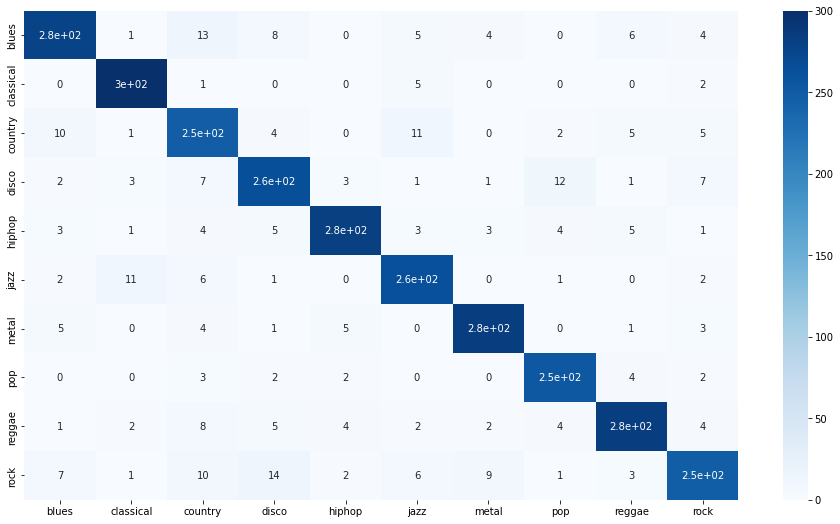

In [7]:
# Final model
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train, y_train)
xgb.save_model("xgb_model.txt")

preds = xgb.predict(X_test)

print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

# Confusion Matrix
confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.savefig("conf matrix")

### Feature Importance

In [17]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(estimator=xgb, random_state=1)
perm.fit(X_test, y_test)

eli5.show_weights(estimator=perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1205 ± 0.0095,perceptr_var
0.0416 ± 0.0031,perceptr_mean
0.0390 ± 0.0049,mfcc4_mean
0.0345 ± 0.0044,chroma_stft_mean
0.0339 ± 0.0062,harmony_mean
0.0280 ± 0.0065,harmony_var
0.0228 ± 0.0049,mfcc9_mean
0.0208 ± 0.0049,mfcc6_mean
0.0181 ± 0.0024,rms_var
0.0174 ± 0.0026,mfcc3_mean
